In [1]:
import pandas as pd

df = pd.read_csv('sentences-translated.csv', index_col=0)

In [2]:
df

,sentence,type,structure,simple,sim_simple,comparator,sim_comparator,target,backwards,sim_backwards
0,They are climbing.,subject-verb,"[{""subject"": ""they"", ""verb"": ""climb"", ""verb_te...",They are climbing.,1.000000,They are climbing.,1.000000,mahuw̃a tsibui-ti.,They are climbing.,1.000000
1,I read.,subject-verb,"[{""subject"": ""I"", ""verb"": ""read"", ""verb_tense""...",I read.,1.000000,I read.,1.000000,nüü tünia-dü.,I read.,1.000000
2,He works.,subject-verb,"[{""subject"": ""he"", ""verb"": ""work"", ""verb_tense...",He works.,1.000000,He works.,1.000000,uhu waakü-dü.,He/she/it works.,0.752505
3,I will cook.,subject-verb,"[{""subject"": ""I"", ""verb"": ""cook"", ""verb_tense""...",I will cook.,1.000000,I will cook.,1.000000,nüü [cook]-wei.,I will cook.,1.000000
4,I am swimming.,subject-verb,"[{""subject"": ""I"", ""verb"": ""swim"", ""verb_tense""...",I am swimming.,1.000000,I am swimming.,1.000000,nüü pahabi-ti.,I am swimming.,1.000000
...,...,...,...,...,...,...,...,...,...,...
120,Anna and Elsa share a bond.,complex,"[{""subject"": ""Anna"", ""verb"": ""share"", ""verb_te...",Anna shares a bond. Elsa shares a bond.,0.933623,I see an object. I see an object.,0.514783,[bond]-noka [anna]-uu u-[share]-dü. [bond]-nei...,Anna shares that bond. Elsa shares a bond.,0.932432
121,Tom and Jerry chase each other.,complex,"[{""subject"": ""Tom"", ""verb"": ""chase"", ""verb_ten...",Tom chases Jerry. Jerry chases Tom.,0.873228,The [SUBJECT] chases the [OBJECT]. The [SUBJEC...,0.629518,[jerry]-noka [tom]-ii u-naki-dü. [tom]-neika [...,Tom chases Jerry. Jerry chases Tom.,0.873228
122,Jack and Jill went up the hill.,complex,"[{""subject"": ""Jack"", ""verb"": ""go"", ""verb_tense...",Jack went to the hill. Jill went to the hill.,0.920877,I went [OBJECT]. I went [OBJECT].,0.551594,[hill]-neika [jack]-uu ma-[go]-ku. [hill]-neik...,Jack went to this hill. Jill went to this hill.,0.897792
123,The king and the queen ruled wisely.,complex,"[{""subject"": ""king"", ""verb"": ""rule"", ""verb_ten...",The king ruled. The queen ruled.,0.880852,I [VERB]. I [VERB].,0.579115,[rule]-ku [king]-ii. [rule]-ku [queen]-uu.,The king ruled. The queen ruled.,0.880852


In [2]:
pt_inputs = df['target'].values.tolist()
pt_inputs = [x.split(".")[0] for x in pt_inputs]

In [4]:
pt_inputs

['mahuw̃a tsibui-ti',
 'nüü tünia-dü',
 'uhu waakü-dü',
 'nüü [cook]-wei',
 'nüü pahabi-ti',
 'uhu [visit]-ku',
 'nüü [eat]-ku',
 "mahuw̃a nishua'i-ti",
 'nüü poyoha-ti',
 "tsiipe'i-ti tsiipa-uu",
 'mahu hubiadu-dü',
 'taagwa tübinohi-ti',
 'uhu [cook]-ti',
 'mahuw̃a nüga-dü',
 'uhuw̃a [travel]-wei',
 'taagwa [travel]-ku',
 'nüügwa [celebrate]-wei',
 "[chase]-ti isha'pugu-uu",
 'mahu wükihaa-dü',
 '[migrate]-wei tsiipa-uu',
 'uhu [paint]-ti',
 'uhu [study]-wei',
 '[grow]-dü [plant]-uu',
 "[bark]-dü isha'pugu-uu",
 'mahu [type]-ti',
 "wo'abi-neika tsiipa-uu a-naki-ku",
 'pagwi-neika pahabichi-ii a-[catch]-ku',
 'pagwi-neika [tom]-uu ma-[catch]-ku',
 "koopi'-eika [rachel]-ii a-[love]-dü",
 '[book]-neika [john]-uu a-nia-ku',
 "[soup]-noka isha'pugu-uu u-düka-ku",
 'tüwoobü-neika [sun]-uu a-[heat]-dü',
 '[thief]-noka [batman]-uu u-[catch]-ku',
 '[letter]-neika [romeo]-uu ma-w̃ui-ku',
 "[pail]-neika [jack]-ii a-dama'i-ku",
 '[song]-noka [susan]-uu u-[sing]-dü',
 '[movie]-neika [mike]-ii a-[

In [1]:
from transformers import BertTokenizer, BertModel, AutoTokenizer, AutoModelForSeq2SeqLM
model_checkpoint="/home/remote/dev/llm/Helsinki-NLP/opus-mt-mul-en_fine-tune/checkpoint-25000/checkpoint-400"
model_checkpoint="/home/remote/dev/llm/Helsinki-NLP/opus-mt-mul-en-no-pretrain-words/checkpoint-2000"
model_checkpoint="/home/remote/dev/llm/Helsinki-NLP/opus-mt-mul-en-word-fine-tune-pt-to-en/checkpoint-3000"
model_checkpoint="/home/remote/dev/llm/Helsinki-NLP/opus-mt-mul-en-word-fine-tune-pt-to-en/checkpoint-3000-words-to-sentences-1k-epochs/checkpoint-400"
# model_checkpoint="/home/remote/dev/llm/Helsinki-NLP/opus-mt-mul-en-word-fine-tune-pt-to-en/checkpoint-3000-words-to-sentences-1k-epochs/checkpoint-400-words-to-sentences-1k-epochs/checkpoint-2000"
# model_checkpoint="/home/remote/dev/llm/Helsinki-NLP/checkpoint-25000"
model_checkpoint="/home/remote/dev/llm/Helsinki-NLP/opus-mt-mul-en-word-fine-tune-en-to-pt-1k/checkpoint-3000-words-to-sentences-1k-epochs-5k-train/checkpoint-16485"
model_checkpoint="/home/remote/dev/llm/Helsinki-NLP/opus-mt-mul-en-word-fine-tune-en-to-pt-1k/checkpoint-3000-words-to-sentences-1k-epochs-5k-train/checkpoint-16485-backwards-pt-to-en-continue-finetune/checkpoint-43960"
# model_checkpoint='marian-finetuned-kde4-en-to-fr/checkpoint-2996'

model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint).to("cuda")

model_checkpoint="/home/remote/dev/llm/Helsinki-NLP/opus-mt-mul-en-word-fine-tune-en-to-pt-1k/checkpoint-3000-words-to-sentences-1k-epochs-5k-train/checkpoint-16485"
model_checkpoint="/home/remote/dev/llm/Helsinki-NLP/opus-mt-mul-en_train-base-model-en-to-pt-5k-training-length/checkpoint-20000"
en_to_pt_model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint).to("cuda")
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

/home/remote/miniconda3/envs/kubi/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/remote/miniconda3/envs/kubi/lib/python3.10/site-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [3]:
input_text = "pahabi"
# input_text="isha'pugu-neika mahu ma-hibi-dü"

In [5]:
inputs

tensor([[ 66, 125,   0]], device='cuda:0')

In [65]:

word_dict = {
"isha'": "coyote",
"isha'pugu": "dog",
"kidi'": "cat",
"pugu": "horse",
"wai": "rice",
"tüba": "pinenuts",
"maishibü": "corn",
"paya": "water",
"payahuupü": "river",
"katünu": "chair",
"toyabi": "mountain",
"tuunapi": "food",
"pasohobü": "tree",
"nobi": "house",
"toni": "wickiup",
"apo": "cup",
"küna": "wood",
"tübbi": "rock",
"tabuutsi'": "cottontail",
"kamü": "jackrabbit",
"aaponu'": "apple",
"tüsüga": "weasle",
"mukita": "lizard",
"wo'ada": "mosquito",
"wükada": "bird snake",
"wo'abi": "worm",
"aingwü": "squirrel",
"tsiipa": "bird",
"tüwoobü": "earth",
"koopi'": "coffee",
"pahabichi": "bear",
"pagwi": "fish",
"kwadzi": "tail",
'ii': 'proximal',
'uu': 'distal',
'katü': 'sit',
'üwi': 'sleep',
'kwisha\'i': 'sneeze',
'poyoha': 'run',
'mia': 'go',
'hukaw̃ia': 'walk',
'wünü': 'stand',
'habi': 'lie down',
'yadoha': 'talk',
'kwatsa\'i': 'fall',
'waakü': 'work',
'wükihaa': 'smile',
'hubiadu': 'sing',
'nishua\'i': 'laugh',
'tsibui': 'climb',
'tübinohi': 'play',
'yotsi': 'fly',
'nüga': 'dance',
'pahabi': 'swim',
'tünia': 'read',
'tümui': 'write',
'tsiipe\'i': 'chirp',
'eika': 'proximal',
'oka': 'distal',
'i': 'me',
'u': 'him',
'ui': 'them',
'ma': 'him',
'mai': 'them',
'a': 'him',
'ai': 'them',
'ni': 'us',
'tei': 'us',
'ta': 'us',
'ü': 'you',
'üi': 'you',
'tüka': 'eat',
'puni': 'see',
'hibi': 'drink',
'naka': 'hear',
'kwana': 'smell',
'kwati': 'hit',
'yadohi': 'talk to',
'naki': 'chase',
'tsibui': 'climb',
'sawa': 'cook',
'tama\'i': 'find',
'nia': 'read',
'mui': 'write',
'nobini': 'visit',
'gaa-wei': 'going to',
'pü': 'have x-ed',
}
new_words = list(word_dict.keys())

In [2]:
import pandas as pd

# df = pd.read_csv('trans-sentences-long.csv')
df = pd.read_csv('translations.csv')

In [13]:
import pandas as pd

# df = pd.read_csv('trans-sentences-long.csv')
# df = pd.read_csv('translations.csv')

df = pd.read_csv('sentences-translated.csv', index_col=0)
df = df[df['type']=="two-clause"]

In [12]:
df['type'].unique()

array(['subject-verb', 'subject-verb-object', 'two-verb', 'two-clause',
       'complex'], dtype=object)

In [3]:
pt_words = df['sentence'].apply(lambda x: x.split())
en_words = df['translation'].apply(lambda x: x.split())

In [6]:
pt_words_split = []
for grp in pt_words:
    pt_words_split.extend(grp)
en_words_split = []
for grp in en_words:
    en_words_split.extend(grp)

In [56]:
import numpy as np
unique_pt = np.unique(pt_words_split)
unique_en  = clean_and_unique(en_words_split)

en_tagged=tag_words(unique_en)


In [62]:
unique_en

{'am',
 'and',
 'appl',
 'are',
 'ate',
 'bear',
 'bird',
 'chair',
 'chase',
 'climb',
 'coffe',
 'cook',
 'corn',
 'cottontail',
 'coyot',
 'dog',
 'down',
 'drink',
 'drunk',
 'earth',
 'eat',
 'eaten',
 'find',
 'fish',
 'fli',
 'food',
 'found',
 'go',
 'ha',
 'hear',
 'heard',
 'here',
 'hesheit',
 'hit',
 'hors',
 'hous',
 'i',
 'is',
 'jackrabbit',
 'laugh',
 'lay',
 'lizard',
 'mosquito',
 'mountain',
 'or',
 'pinenut',
 'play',
 'read',
 'rice',
 'river',
 'rock',
 'run',
 'saw',
 'see',
 'seen',
 'sing',
 'sit',
 'sleep',
 'slept',
 'smell',
 'smile',
 'snake',
 'sneez',
 'squirrel',
 'stand',
 'tail',
 'talk',
 'that',
 'the',
 'these',
 'they',
 'thi',
 'those',
 'to',
 'tree',
 'us',
 'visit',
 'walk',
 'water',
 'we',
 'weasel',
 'wickiup',
 'will',
 'wood',
 'work',
 'worm',
 'write',
 'writteni',
 'wrote',
 'you'}

In [64]:
en_tagged

{'writteni': 'NN',
 'here': 'RB',
 'corn': 'NN',
 'we': 'PRP',
 'drunk': 'NN',
 'cook': 'NN',
 'cottontail': 'NN',
 'dog': 'NN',
 'hear': 'NN',
 'write': 'NN',
 'these': 'DT',
 'bear': 'NN',
 'sing': 'VBG',
 'hesheit': 'NN',
 'jackrabbit': 'NN',
 'weasel': 'NN',
 'those': 'DT',
 'laugh': 'NN',
 'run': 'VB',
 'wood': 'NN',
 'slept': 'NN',
 'coyot': 'NN',
 'smile': 'NN',
 'stand': 'NN',
 'rock': 'NN',
 'talk': 'NN',
 'saw': 'NN',
 'heard': 'NN',
 'sit': 'NN',
 'pinenut': 'NN',
 'down': 'RB',
 'thi': 'NN',
 'squirrel': 'NN',
 'wickiup': 'NN',
 'river': 'NN',
 'play': 'NN',
 'walk': 'NN',
 'appl': 'NN',
 'fish': 'NN',
 'fli': 'NN',
 'wrote': 'VBD',
 'seen': 'VBN',
 'read': 'NN',
 'eat': 'NN',
 'and': 'CC',
 'to': 'TO',
 'tree': 'NN',
 'mountain': 'NN',
 'worm': 'NN',
 'ha': 'NN',
 'hous': 'JJ',
 'climb': 'NN',
 'hit': 'NN',
 'you': 'PRP',
 'i': 'NN',
 'am': 'VBP',
 'they': 'PRP',
 'coffe': 'NN',
 'drink': 'NN',
 'water': 'NN',
 'eaten': 'VB',
 'earth': 'NN',
 'tail': 'NN',
 'sleep': 'NN',


In [3]:
from collections import defaultdict
en_by_key=defaultdict(list)


for k, v in en_tagged.items():
    en_by_key[v].append(k)

en_by_key

NameError: name 'en_tagged' is not defined

In [63]:
en_by_key.keys()

dict_keys(['NN', 'RB', 'PRP', 'DT', 'VBG', 'VB', 'VBD', 'VBN', 'CC', 'TO', 'JJ', 'VBP', 'NNS', 'VBZ', 'MD', 'IN'])

In [67]:
en_words_dict = list(word_dict.values())

In [68]:
for nn in en_by_key['NN']:
    if nn not in en_words_dict:
        print(nn)

writteni
drunk
hesheit
weasel
slept
coyot
saw
heard
pinenut
thi
appl
fli
ha
i
coffe
found
snake
ate
sneez
lay


In [4]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/remote/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/remote/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [48]:
en_tagged

{'am',
 'and',
 'appl',
 'are',
 'ate',
 'bear',
 'bird',
 'chair',
 'chase',
 'climb',
 'coff',
 'cook',
 'corn',
 'cottontail',
 'coyot',
 'dog',
 'down',
 'drink',
 'drunk',
 'earth',
 'eat',
 'eaten',
 'find',
 'fish',
 'fli',
 'food',
 'found',
 'go',
 'ha',
 'hear',
 'heard',
 'here',
 'hesheit',
 'hit',
 'hor',
 'hou',
 'i',
 'is',
 'jackrabbit',
 'laugh',
 'lay',
 'lizard',
 'mosquito',
 'mountain',
 'or',
 'pinenut',
 'play',
 'read',
 'rice',
 'river',
 'rock',
 'run',
 'saw',
 'see',
 'seen',
 'sing',
 'sit',
 'sleep',
 'slept',
 'smell',
 'smile',
 'snake',
 'sneez',
 'squirrel',
 'stand',
 'tail',
 'talk',
 'that',
 'the',
 'these',
 'they',
 'thi',
 'those',
 'to',
 'tree',
 'us',
 'visit',
 'walk',
 'water',
 'we',
 'weasel',
 'wickiup',
 'will',
 'wood',
 'work',
 'worm',
 'write',
 'writteni',
 'wrote',
 'you'}

In [19]:
unique_en

array(['Coffee', 'He/she/it', 'I', 'I.', 'That', 'The', 'These', 'They',
       'This', 'Those', 'Water', 'We', 'You', 'am', 'and', 'apple',
       'apple.', 'apples.', 'are', 'ate', 'bear', 'bear.', 'bird',
       'bird.', 'birds.', 'chair', 'chair.', 'chairs.', 'chase', 'chased',
       'chasing', 'climb.', 'climbed.', 'climbing.', 'climbs.', 'coffee',
       'coffees.', 'cook', 'cooked', 'cooking', 'corn', 'corn.',
       'cottontail', 'cottontail.', 'coyote', 'coyotes.', 'dog', 'dog.',
       'dogs.', 'down.', 'drink', 'drinking', 'drunk', 'earth.',
       'earths.', 'eaten', 'eating', 'find', 'finds', 'fish', 'fish.',
       'fly.', 'food', 'food.', 'foods', 'found', 'going', 'has', 'hear',
       'heard', 'hearing', 'hears', 'here.', 'hit', 'hitting', 'horse',
       'horses.', 'house', 'is', 'jackrabbit', 'laughing.', 'lay',
       'lizard', 'lizard.', 'lizards.', 'mosquito', 'mosquitoes.',
       'mountain', 'mountain.', 'or', 'pinenuts', 'pinenuts.', 'played.',
       'read', 

In [6]:
tokenizer.add_tokens(new_words)

71

In [5]:
print(len(tokenizer))  # 28997


64240


In [7]:
tokenizer.add_tokens(new_words)
print(len(tokenizer))  # 28997


model.resize_token_embeddings(len(tokenizer)) 

64243


Embedding(64243, 512)

In [27]:
model.get_output_embeddings()

Linear(in_features=512, out_features=64243, bias=False)

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag


In [8]:

def tag_words(strings):
    word_tags = {}

    for string in strings:
        # Tokenize the string into words
        words = word_tokenize(string)
        # POS tagging
        pos_tags = pos_tag(words)
        # Store each word with its corresponding POS tag in the dictionary
        for word, tag in pos_tags:
            word_tags[word] = tag

    return word_tags


In [51]:
strings = ["The cats are running.", "A cat runs fast.", "Running cats!", "Run, cat, run!"]
word_types = tag_words(strings)
print(word_types)

{'The': 'DT', 'cats': 'NNS', 'are': 'VBP', 'running': 'VBG', '.': '.', 'A': 'DT', 'cat': 'NN', 'runs': 'VBZ', 'fast': 'RB', 'Running': 'VBG', '!': '.', 'Run': 'NNP', ',': ',', 'run': 'NN'}


In [36]:
del model
del tokenizer

In [17]:
tgt = df['simple'].values.tolist()
tgt

['The bird chirped. The squirrel jumped.',
 'Mike cooked. My sister danced.',
 'The dog ate soup. The cat ran.',
 'Susan sings. I read.',
 'Harry wrote. Ron read.',
 'The king sat. The queen stood.',
 'Tom slept. Jerry watched.',
 'Rachel danced. Monica sang.',
 'Jack climbed. Jill followed.',
 'Alice laughs. Bob cries.',
 'My brother drove. I waited.',
 'Romeo called. Juliet answered.',
 'The captain shouted. The crew responded.',
 'Anna swam. Elsa skated.',
 'The sun shone. The moon glowed.',
 'Mom laughs. Dad cries.',
 'The lion hunted. The tiger rested.',
 'The writer typed. The poet thought.',
 'The teacher spoke. The student listened.',
 'John traveled. Mary studied.',
 'The bear roars. The fox hides.',
 'The chef baked. The assistant cleaned.',
 'Batman swung. Robin landed.',
 'Paul jumped. Peter ducked.',
 'Linda painted. My friend sketched.']

In [6]:
src = df['translation'].values.tolist()
src

['This cooked us.',
 'That coyote has drunk these pinenuts.',
 'Those pinenuts climb.',
 'They are going to write to us, you and I.',
 'The mosquito is cooking the apple.',
 'The rock has talked to the earth.',
 'That river is sitting.',
 'You will sneeze.',
 'This coyote is going to write these rocks.',
 'The wickiup is standing.',
 'This found these dogs.',
 'This will find these mosquitoes.',
 'The cottontail saw those pinenuts.',
 'He/she/it is reading these corn.',
 'This coffee read those bird snakes.',
 'That food has worked.',
 'This chair will visit those coffees.',
 'He/she/it reads the squirrel.',
 'That corn is going to smile.',
 'That coyote will cook those coyotes.',
 'This squirrel climbs.',
 'This chair will see this rock.',
 'The bird snake climbed.',
 'The mosquito is drinking the water.',
 'He/she/it has written/is writing this fish.',
 'That cottontail is going to visit those dogs.',
 'He/she/it is going to drink this water.',
 'I am laughing.',
 'This apple has eat

In [18]:
results = []
pt_outputs = []
en_outputs=[]
for input_text in tgt:
    inputs = tokenizer(input_text,  return_tensors="pt").to("cuda")

    outputs = en_to_pt_model.generate(**inputs,  output_scores=True,max_length=512, min_length=1, top_p=0.9, do_sample=True)


    out = tokenizer.decode(outputs[0], skip_special_tokens=True)


    inputs = tokenizer(out,  return_tensors="pt").to("cuda")
    outputs = model.generate(**inputs,  output_scores=True,max_length=512, min_length=1, top_p=0.9, do_sample=True)
    out = tokenizer.decode(outputs[0], skip_special_tokens=True)

    en_outputs.append(out)



In [7]:
results = []
pt_outputs = []
en_outputs=[]
for input_text in src:
    inputs = tokenizer(input_text,  return_tensors="pt").to("cuda")

    outputs = en_to_pt_model.generate(**inputs,  output_scores=True,max_length=512, min_length=1, top_p=0.9, do_sample=True)


    out = tokenizer.decode(outputs[0], skip_special_tokens=True)
    pt_outputs.append(out)



In [10]:
pt_outputs[:5], tgt[:5]

(['ta-zawa-ku ihi',
  "isha'-uu tüba-neika ai-hibi-pü",
  'tüba-uu tsibui-dü',
  'ta-w̃ui-gaa-wei uhuw̃a',
  "wo'ada-uu aaponu'-eika ma-zawa-ti"],
 ['tei-zawa-ku ihi',
  "isha'-uu tüba-neika ai-hibi-pü",
  'tüba-uu tsibui-dü',
  'ta-w̃ui-gaa-wei mahuw̃a',
  "wo'ada-uu aaponu'-oka u-zawa-ti"])

In [7]:
input_text=tgt[0]
inputs = tokenizer(input_text,  return_tensors="pt").to("cuda")

outputs = model.generate(**inputs,  output_scores=True,max_length=512, min_length=1, top_p=0.9, do_sample=True)


en_out = tokenizer.decode(outputs[0], skip_special_tokens=True)


inputs = tokenizer(en_out,  return_tensors="pt").to("cuda")

outputs = en_to_pt_model.generate(**inputs,  output_scores=True,max_length=512, min_length=1, top_p=0.9, do_sample=True)


pt_out = tokenizer.decode(outputs[0], skip_special_tokens=True)


en_out, input_text, pt_out

('This cooked us.', 'tei-zawa-ku ihi', 'ta-zawa-ku ihi')

In [8]:
results = []
pt_outputs = []
en_outputs=[]
for input_text in tgt:
    inputs = tokenizer(input_text,  return_tensors="pt").to("cuda")

    outputs = model.generate(**inputs,  output_scores=True,max_length=512, min_length=1, top_p=0.9, do_sample=True)


    out = tokenizer.decode(outputs[0], skip_special_tokens=True)
    en_outputs.append(out)


    inputs = tokenizer(out,  return_tensors="pt").to("cuda")
    outputs = en_to_pt_model.generate(**inputs,  output_scores=True,max_length=512, min_length=1, top_p=0.9, do_sample=True)
    out = tokenizer.decode(outputs[0], skip_special_tokens=True)
    pt_outputs.append(out)

In [11]:
src

['This cooked us.',
 'That coyote has drunk these pinenuts.',
 'Those pinenuts climb.',
 'They are going to write to us, you and I.',
 'The mosquito is cooking the apple.',
 'The rock has talked to the earth.',
 'That river is sitting.',
 'You will sneeze.',
 'This coyote is going to write these rocks.',
 'The wickiup is standing.',
 'This found these dogs.',
 'This will find these mosquitoes.',
 'The cottontail saw those pinenuts.',
 'He/she/it is reading these corn.',
 'This coffee read those bird snakes.',
 'That food has worked.',
 'This chair will visit those coffees.',
 'He/she/it reads the squirrel.',
 'That corn is going to smile.',
 'That coyote will cook those coyotes.',
 'This squirrel climbs.',
 'This chair will see this rock.',
 'The bird snake climbed.',
 'The mosquito is drinking the water.',
 'He/she/it has written/is writing this fish.',
 'That cottontail is going to visit those dogs.',
 'He/she/it is going to drink this water.',
 'I am laughing.',
 'This apple has eat

In [9]:
en_outputs

['This cooked us.',
 'The coyote has drunk these pinenuts.',
 'Those pinenuts climb.',
 'They are going to write to us (you and me).',
 'That mosquito is cooking that apple.',
 'That rock has talked to this earth.',
 'The river is sitting.',
 'You will sneeze.',
 'This coyote is going to write these rocks.',
 'That wickiup is standing.',
 'This found these dogs.',
 'This will find these mosquitoes.',
 'The cottontail saw the pinenuts.',
 'He/she/it is reading these corns.',
 'This coffee read those bird snakes.',
 'That food has worked.',
 'This chair will visit those coffees.',
 'He/she/it reads this squirrel.',
 'That corn is going to smile.',
 'That coyote will cook those coyotes.',
 'This squirrel climbs.',
 'This chair will see this rock.',
 'The bird snake climbed.',
 'The mosquito is drinking the water.',
 'He/she/it has written or is writing this fish.',
 'The cottontail is going to visit the dogs.',
 'He/she/it is going to drink these waters.',
 'I am laughing.',
 'This apple 

In [9]:
target = df['sentence'].values.tolist()
target

['tei-zawa-ku ihi',
 "isha'-uu tüba-neika ai-hibi-pü",
 'tüba-uu tsibui-dü',
 'ta-w̃ui-gaa-wei mahuw̃a',
 "wo'ada-uu aaponu'-oka u-zawa-ti",
 'tübbi-uu tüwoobü-neika a-yadohi-pü',
 'payahuupü-uu katü-ti',
 "kwisha'i-wei üü",
 "isha'-ii tübbi-neika mai-w̃ui-gaa-wei",
 'toni-uu wünü-ti',
 "isha'pugu-neika ihi mai-dama'i-ku",
 "wo'ada-neika ihi mai-dama'i-gaa-wei",
 "tabuutsi'-uu tüba-noka u-buni-ku",
 'maishibü-neika uhu ai-nia-ti',
 "koopi'-ii wükada-noka ui-nia-ku",
 'tuunapi-uu waakü-pü',
 "katünu-ii koopi'-oka ui-nobini-wei",
 'aingwü-neika mahu ma-nia-dü',
 'maishibü-uu wükihaa-gaa-wei',
 "isha'-uu isha'-oka ui-zawa-wei",
 'aingwü-ii tsibui-dü',
 'katünu-ii tübbi-neika ma-buni-wei',
 'wükada-uu tsibui-ku',
 "wo'ada-uu paya-neika ma-hibi-ti",
 'pagwi-neika mahu ma-w̃ui-pü',
 "tabuutsi'-uu isha'pugu-neika mai-nobini-gaa-wei",
 'paya-neika mahu mai-hibi-gaa-wei',
 "nishua'i-pü nüü",
 "aaponu'-ii küna-neika a-düka-pü",
 'katü-dü uhu',
 "mukita-uu isha'pugu-noka u-naki-ti",
 "isha'-oka ü

In [21]:
out

'pugu-neika mahu mai-naka-ku'

In [20]:
target[-1]

'pugu-neika mahu ai-naka-ku'

In [48]:
tokenizer.tokenize(t)

['▁pu', 'gu', '-', 'ne', 'ika', '▁mahu', '▁ai', '-', 'naka', '-', 'ku']

In [6]:
import nltk
from nltk.translate.bleu_score import SmoothingFunction

scores=[]
chencherry = SmoothingFunction()
ground_truth = tgt
predictions = en_outputs

for idx in range(len(ground_truth)):
    t= ground_truth[idx]
    s= predictions[idx]
    ref_input = [tokenizer.tokenize(t)]
    src_input = tokenizer.tokenize(s)
    BLEUscore = nltk.translate.bleu_score.sentence_bleu(ref_input, src_input, smoothing_function=chencherry.method2)
    scores.append(BLEUscore)

In [7]:
scores

[0.45252059461048205,
 0.23423385316385045,
 0.18990420965596824,
 0.10017352164720726,
 0.14878510561974442,
 0.08955669904048644,
 0.12909944487358058,
 0.10600313379512592,
 0.13752621333718326,
 0.07812894659415162,
 0.09921681996718158,
 0.07562316203317582,
 0.06584451983162615,
 0.19672555985989182,
 0.10520695712327796,
 0.11858107572819082,
 0.06853592099409837,
 0.07326369397705634,
 0.08042267813208016,
 0.16036590969929357,
 0.09120158603013463,
 0.1503260376347647,
 0.10768746526902671,
 0.06560271639619886,
 0.059412275248808384]

In [19]:
tgt[:5], en_outputs[:5]

(['The bird chirped. The squirrel jumped.',
  'Mike cooked. My sister danced.',
  'The dog ate soup. The cat ran.',
  'Susan sings. I read.',
  'Harry wrote. Ron read.'],
 ['The bird chirped.',
  'That chair danced.',
  'That dog ate this cup.',
  'I sing.',
  'That chair read.'])

In [8]:
en_outputs

['The bird saw the squirrel.',
 'The bear heard the food.',
 'That dog is eating that cup.',
 'That chair wrote.',
 'The fly is walking.',
 'The chair is finding the coyote.',
 'You and I see that lizard.',
 'This rice finds those fish.',
 'The writing wrote the coffee.',
 'The jackrabbit played.',
 'The cottontail saw those chairs.',
 'The jackrabbit cooked those tails.',
 'That corn read this tree.',
 'I will see this lizard.',
 'This laugh flew.',
 'The mountain saw those sneezes.',
 'That bird plays.',
 'They are cooking these waters.',
 'The rice is chasing the house.',
 'You and I are sleeping.',
 'I chased the tail.',
 'You and I chase us, you and I.',
 'The jackrabbit will hear the bird.',
 'This wood smiled.',
 'This corn talks.']

(0.0, 1.1)

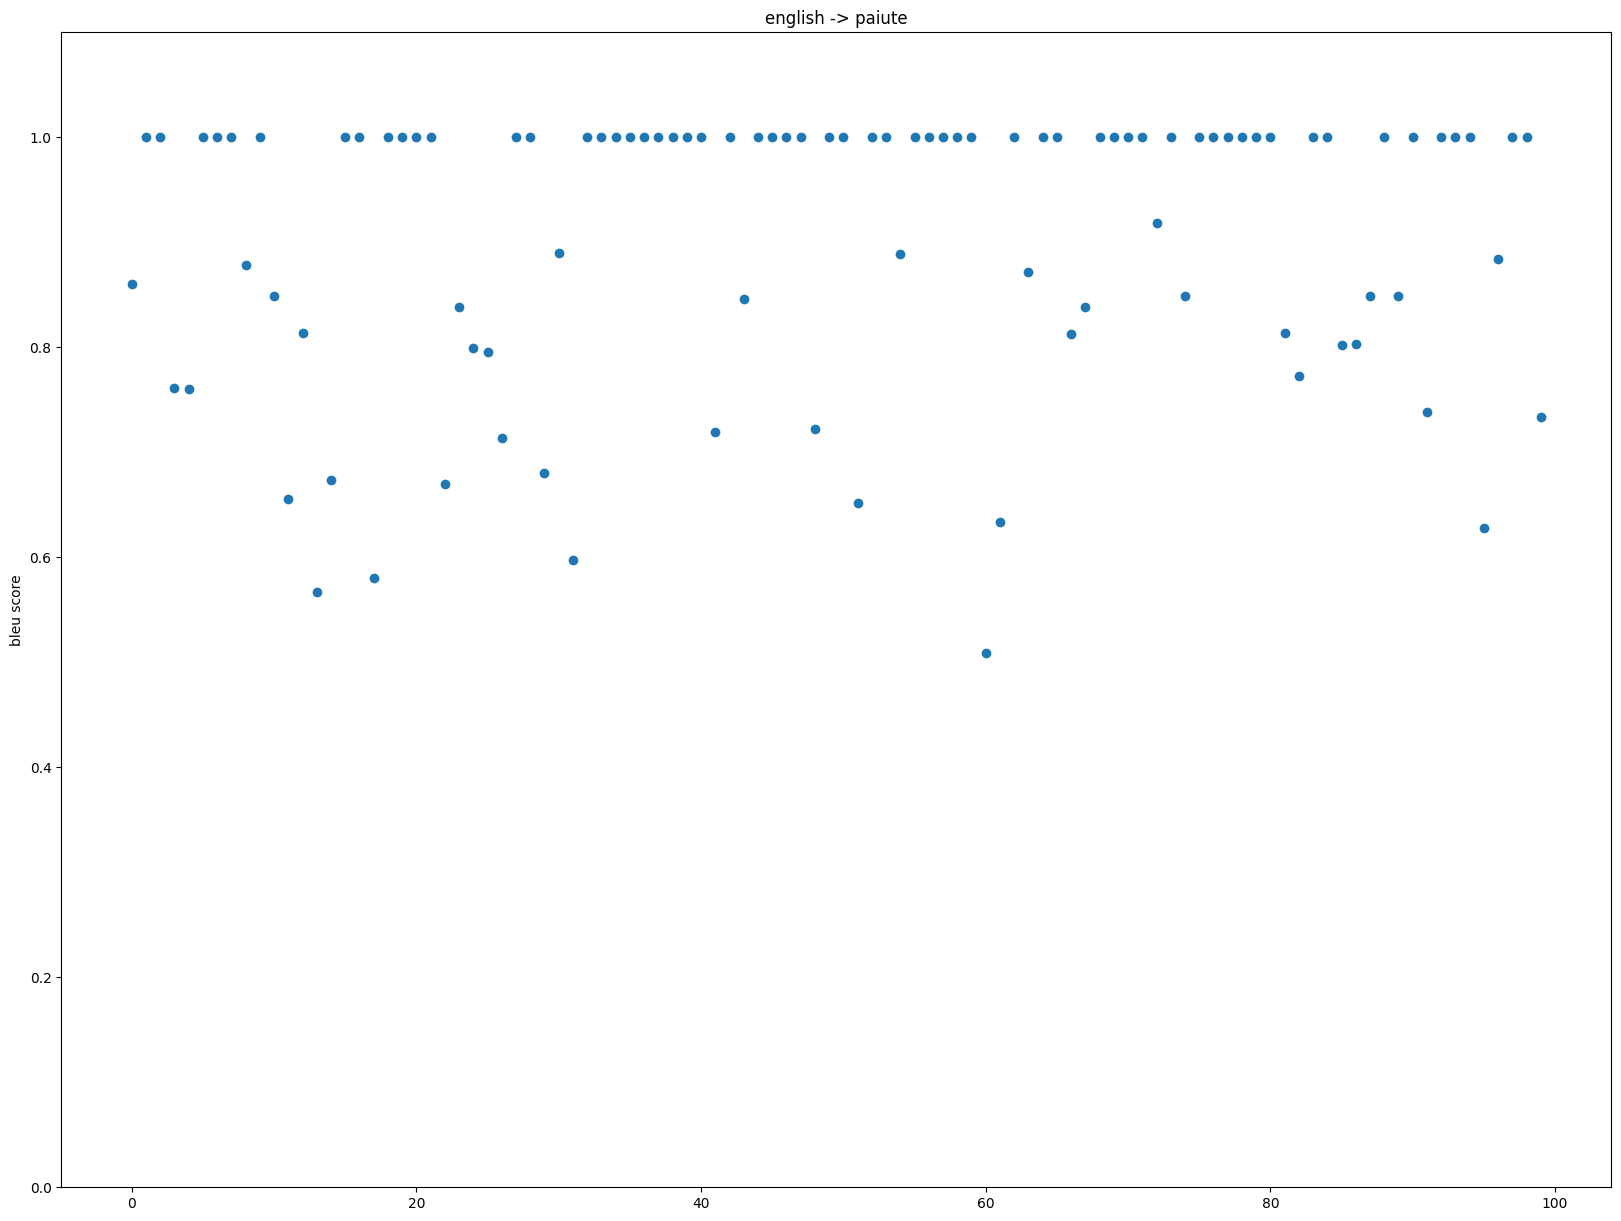

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
plt.scatter(range(len(scores)), scores)
plt.ylabel('bleu score')


plt.title('english -> paiute')
plt.ylim(0, 1.1)

In [33]:
import numpy as np


def levenshteinDistance(token1, token2):
    distances = np.zeros((len(token1) + 1, len(token2) + 1))

    for t1 in range(len(token1) + 1):
        distances[t1][0] = t1

    for t2 in range(len(token2) + 1):
        distances[0][t2] = t2

    a = 0
    b = 0
    c = 0

    for t1 in range(1, len(token1) + 1):
        for t2 in range(1, len(token2) + 1):
            if (token1[t1-1] == token2[t2-1]):
                distances[t1][t2] = distances[t1 - 1][t2 - 1]
            else:
                a = distances[t1][t2 - 1]
                b = distances[t1 - 1][t2]
                c = distances[t1 - 1][t2 - 1]

                if (a <= b and a <= c):
                    distances[t1][t2] = a + 1
                elif (b <= a and b <= c):
                    distances[t1][t2] = b + 1
                else:
                    distances[t1][t2] = c + 1

    return distances[len(token1)][len(token2)]


def levenshteinRecursive(str1, str2, m, n):
      # str1 is empty
    if m == 0:
        return n
    # str2 is empty
    if n == 0:
        return m
    if str1[m - 1] == str2[n - 1]:
        return levenshteinRecursive(str1, str2, m - 1, n - 1)
    return 1 + min(
          # Insert     
        levenshteinRecursive(str1, str2, m, n - 1),
        min(
              # Remove
            levenshteinRecursive(str1, str2, m - 1, n),
          # Replace
            levenshteinRecursive(str1, str2, m - 1, n - 1))
    )

import nltk
scores=[]
ground_truth = tgt
predictions = pt_outputs
for idx in range(len(ground_truth)):
    t=ground_truth[idx]
    s= predictions[idx]
    ref_input = t#[t.split()]
    src_input = s#s.split()
    BLEUscore = levenshteinDistance(ref_input, src_input)#, len(ref_input), len(src_input))
    scores.append(BLEUscore)
    print(idx)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [16]:
ref_input, 

'pugu-neika mahu ai-naka-ku'

In [35]:
np.max(scores)

9.0

Text(0.5, 1.0, 'english -> paiute')

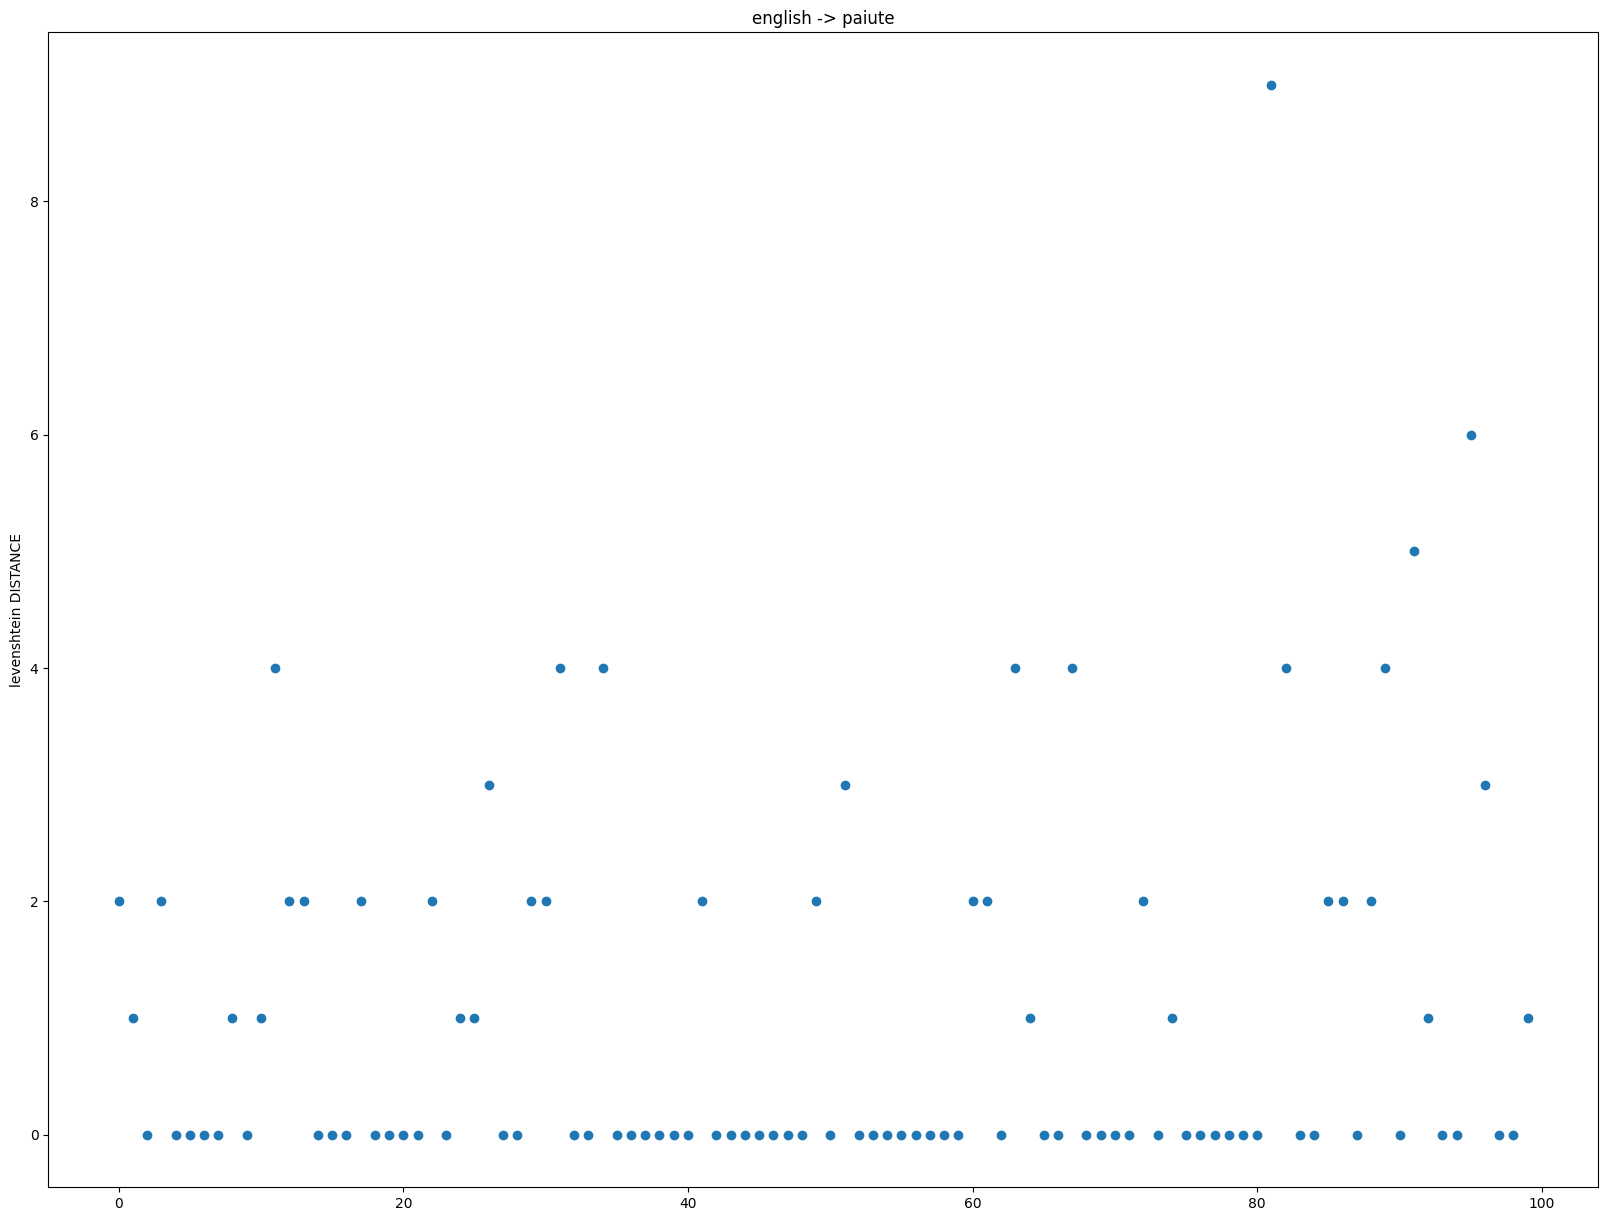

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
plt.scatter(range(len(scores)), scores)
plt.ylabel('levenshtein DISTANCE')


plt.title('english -> paiute')
# plt.ylim(0, 1.1)

In [17]:
input_text = "kamü"

input_text = "pugu"
input_text = "toyabi-ii kamü-neika ma-naki-ti"
# input_text="tabuutsi -ii habi-ku"
# input_text="üi naki tüsüga"
# input_text="m"
input_text="tüsüga-noka uhuw̃a ui-gwati-ku"
input_text="He/she/it chased those tails."

inputs = tokenizer(input_text,  return_tensors="pt").to("cuda")

outputs = model.generate(**inputs,  output_scores=True,max_length=512, min_length=1, top_p=0.9, do_sample=True)


out = tokenizer.decode(outputs[0], skip_special_tokens=True)
out

'kwadzi-noka mahu ui-naki-ku'

In [34]:
import re
import nltk
from nltk.stem import PorterStemmer

# Download the necessary resources for nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /home/remote/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Initialize the Porter Stemmer
ps = PorterStemmer()

def clean_and_unique(strings):
    cleaned_strings = set()
    
    for string in strings:
        # Remove special characters
        cleaned_string = re.sub(r'[^a-zA-Z0-9\s]', '', string)
        # Convert to lowercase
        cleaned_string = cleaned_string.lower()
        # Tokenize the string into words
        words = word_tokenize(cleaned_string)
        # Stem each word
        stemmed_words = [ps.stem(word) for word in words]
        # Join the stemmed words back into a string
        stemmed_string = ' '.join(stemmed_words)
        # Add to set to ensure uniqueness
        cleaned_strings.add(stemmed_string)
    
    return cleaned_strings

# Example usage
strings = ["The cats are running.", "A cat runs fast.", "Running cats!", "Run, cat, run!"]
unique_strings = clean_and_unique(strings)
print(unique_strings)  # Output will be stemmed forms, e.g., {'cat run', 'the cat ar run', 'a cat run fast'}


{'the cat are run', 'a cat run fast', 'run cat', 'run cat run'}


In [52]:
unique_en  = tag_words(en_words_split)


In [53]:
unique_en

{'This': 'DT',
 'cooked': 'NNS',
 'us': 'PRP',
 '.': '.',
 'That': 'DT',
 'coyote': 'NN',
 'has': 'VBZ',
 'drunk': 'NN',
 'these': 'DT',
 'pinenuts': 'NNS',
 'Those': 'DT',
 'climb': 'NN',
 'They': 'PRP',
 'are': 'VBP',
 'going': 'VBG',
 'to': 'TO',
 'write': 'NN',
 ',': ',',
 'you': 'PRP',
 'and': 'CC',
 'I': 'PRP',
 'The': 'DT',
 'mosquito': 'NN',
 'is': 'VBZ',
 'cooking': 'NN',
 'the': 'DT',
 'apple': 'NN',
 'rock': 'NN',
 'talked': 'VBD',
 'earth': 'NN',
 'river': 'NN',
 'sitting': 'VBG',
 'You': 'PRP',
 'will': 'MD',
 'sneeze': 'NN',
 'rocks': 'NNS',
 'wickiup': 'NN',
 'standing': 'NN',
 'found': 'NN',
 'dogs': 'NNS',
 'find': 'VB',
 'mosquitoes': 'NNS',
 'cottontail': 'NN',
 'saw': 'NN',
 'those': 'DT',
 'He/she/it': 'NN',
 'reading': 'NN',
 'corn': 'NN',
 'coffee': 'NN',
 'read': 'NN',
 'bird': 'NN',
 'snakes': 'NNS',
 'food': 'NN',
 'worked': 'VBN',
 'chair': 'NN',
 'visit': 'NN',
 'coffees': 'NNS',
 'reads': 'NNS',
 'squirrel': 'NN',
 'smile': 'NN',
 'cook': 'NN',
 'coyotes': 

In [50]:
outputs

tensor([[64171,  1581,  8247,  1135,   206, 13075, 30562,     6,     2,     0]],
       device='cuda:0')

In [28]:
tokenizer.tokenize(input_text)

['▁pa', 'so', 'ho', 'b', 'ü', 'a', '▁u', 'i', '-', 'nia', '-', 'ku']

In [13]:
input_text = "toyabi-ii kamü-neika ma-naki-ti"


for item in input_text.split():
    for subitem in item.split("-"):
        inputs = tokenizer(subitem.strip(),  return_tensors="pt").input_ids.to("cuda")

        outputs = model.generate(inputs)#,max_length=512, min_length=8, top_p=0.9, do_sample=True)


        out = tokenizer.decode(outputs[0], skip_special_tokens=True)
        print(subitem, "___", out)

toyabi ___ The mountain climbed.
ii ___ This
kamü ___ That jackrabbit smiles.
neika ___ This will hear these pinenuts.
ma ___ You and I wrote.
naki ___ This weasel is going to chase this earth.
ti ___ This


In [9]:
tokenizer.tokenize(input_text)

['toyabi',
 '▁-',
 'ii',
 'kamü',
 '▁-',
 'n',
 'eika',
 '▁ma',
 '-',
 'naki',
 '▁-',
 'ti']

In [15]:
pt_inputs

['They are climbing',
 'I read',
 'He works',
 'I will cook',
 'I am swimming',
 'He visited',
 'I ate',
 'They were laughing',
 'I was running',
 'The bird was chirping',
 'She sings',
 'We are playing',
 'She is cooking',
 'They dance',
 'They will travel',
 'We traveled',
 'We will celebrate',
 'The dog is chasing',
 'She smiles',
 'The bird will migrate',
 'He was painting',
 'She will study',
 'The plant grows',
 'The dog barks',
 'She was typing',
 'The bird chased a worm',
 'The bear caught a fish',
 'Tom caught a fish',
 'Rachel loves coffee',
 'John read a book',
 'The dog ate soup',
 'The sun heats the earth',
 'Batman caught the thief',
 'Romeo wrote a letter',
 'Jack found a pail',
 'Susan sings a song',
 'Mike watched a movie',
 'The king wore a crown',
 'The lion hunted a deer',
 'The captain steered the ship',
 'Harry received a letter',
 'Linda bought a dress',
 'The chef prepared a meal',
 'My brother drives a car',
 'Alice opened the door',
 'Paul plays the guitar',
 

In [19]:
model_output = []

for item in pt_inputs[:]:
    inputs = tokenizer(item,  return_tensors="pt").input_ids.to("cuda")

    outputs = model.generate(inputs)#,max_length=512, min_length=8, top_p=0.9, do_sample=True)


    out = tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    model_output.append(out)
model_output, item


(['They climb.',
  'I read.',
  'He/she/it works.',
  'I am going to cook that coyotes.',
  'I am laughing.',
  'You and I will visit.',
  'I am laughing.',
  'They are laughing.',
  'I am going to write to you, you and I.',
  'The bird has heard those birds.',
  'He/she/it sings.',
  'This found these dogs.',
  'That coyote has drunk these coyotes.',
  'They write.',
  'They are going to write to us, you and I.',
  'We are going to write to those horses.',
  'We are sleeping.',
  'That dog is hearing these rocks.',
  'He/she/it smiles.',
  'That bird has heard those horses.',
  'You and I wrote.',
  'You and I will.',
  'That corn is hearing these trees.',
  'That rock heard us, you and I.',
  'He/she/it is climbing.',
  'He/she/it heard these worms.',
  'The fish is eating those fish.',
  'He/she/it heard these fish.',
  'This coffee read those coyotes.',
  'He/she/it heard these rocks.',
  'The dog chased those dogs.',
  'That earth is hearing these earths.',
  'That weasel is going

In [18]:
model_output_1 = []

for item in model_output[:]:
    inputs = tokenizer(item,  return_tensors="pt").input_ids.to("cuda")

    outputs = model.generate(inputs)#,max_length=512, min_length=8, top_p=0.9, do_sample=True)


    out = tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    model_output_1.append(out)


KeyboardInterrupt: 

In [8]:
ground_truth = df['sentence'].values.tolist()


In [20]:
for item in range(len(model_output)):
    print(model_output[item], "___", df['sentence'].iloc[item])

They climb. ___ They are climbing.
I read. ___ I read.
He/she/it works. ___ He works.
I am going to cook that coyotes. ___ I will cook.
I am laughing. ___ I am swimming.
You and I will visit. ___ He visited.
I am laughing. ___ I ate.
They are laughing. ___ They were laughing.
I am going to write to you, you and I. ___ I was running.
The bird has heard those birds. ___ Birds were chirping.
He/she/it sings. ___ She sings.
This found these dogs. ___ We are playing.
That coyote has drunk these coyotes. ___ She is cooking.
They write. ___ They danced.
They are going to write to us, you and I. ___ They will travel.
We are going to write to those horses. ___ We traveled.
We are sleeping. ___ We will celebrate.
That dog is hearing these rocks. ___ Dogs are chasing.
He/she/it smiles. ___ She smiled.
That bird has heard those horses. ___ Birds will migrate.
You and I wrote. ___ He was painting.
You and I will. ___ She will study.
That corn is hearing these trees. ___ Plants grow.
That rock heard

In [24]:
for item in range(len(model_output_1)):
    print(model_output[item], "___", model_output_1[item], "____",pt_inputs[item])

tsibui-dü mahuw̃a ___ They climb. ____ They are climbing
tünia-ku nüü ___ I read. ____ I read
He/she/it is reading these wickiups. ___ tsiipa-noka uhu u-buni-ti ____ He works
katünu-wei mahuw̃a ___ They are seeing these earths. ____ I will cook
nishua'i-pü nüü ___ I am laughing. ____ I am swimming
He/she/it visited us. ___ tsiipa-noka u-dü ____ He visited
katünu-dü uhuw̃a ___ They talked. ____ I ate
nishua'i-pü nüü ___ I am laughing. ____ They were laughing
poyoha-pü nüügwa ___ We are running the wickiupiupü-pü ____ I was running
tsiipa-uu tsiipa-noka u-naki-ti ___ The bird is chasing the bird. ____ The bird was chirping
He/she/it sings. ___ habi-neika mahu mai-dama'i-ku ____ She sings
üwi-dü nüügwa ___ We are sleeping. ____ We are playing
koopi'-uu coyotes. ___ isha'-oka üü ui-dama'i-ku ____ She is cooking
katünu-dü uhuw̃a ___ They talked. ____ They dance
kwisha'i-wei üü ___ yabi-i will sneeze. ____ They will travel
tübbi-uu tsibui-ku ___ Those pinenuts climbed. ____ We traveled
üwi-k

In [28]:
import spacy


In [9]:
def semantic_similarity_spacy(sentence1: str, sentence2: str) -> float:
    """Compute the semantic similarity between two sentences using spaCy.

    Args:
        sentence1 (str): The first sentence.
        sentence2 (str): The second sentence.

    Returns:
        float: The semantic similarity between the two sentences.
    """
    import spacy

    nlp = spacy.load("en_core_web_md")
    doc1 = nlp(sentence1)
    doc2 = nlp(sentence2)
    similarity = doc1.similarity(doc2)
    return similarity


In [10]:
sim_results =[semantic_similarity_spacy(a, b) for a, b in zip(ground_truth, model_output)]

In [11]:
sim_results

[1.0,
 1.0,
 0.6225382546131357,
 0.9572216683844355,
 0.78291695925981,
 0.5792520728100532,
 0.8666321671224397,
 0.8498175169586877,
 0.7752372779352595,
 0.6878771075258473,
 0.6298100313841433,
 0.5037488599510352,
 0.6877036009139501,
 0.712834852786273,
 0.781156573158271,
 0.7746292305956954,
 0.9025745628696041,
 0.462985771507203,
 0.5789549062627072,
 0.6018511316109844,
 0.5417647442390984,
 0.5863872539759794,
 0.4750961044519901,
 0.37666680404847525,
 0.6031558641242187,
 0.6200412238656734,
 0.8736726304050834,
 0.623111994427254,
 0.6350166555241392,
 0.5977559901145002,
 0.5485133244841061,
 0.5398251423817668,
 0.541530663841815,
 0.7446992843143526,
 0.659921863843651,
 0.3662877350730777,
 0.4752074798037221,
 0.4615314560145935,
 0.7441285512177228,
 0.5698052062613577,
 0.5980032035766809,
 0.5513283267019914,
 0.4830713286652533,
 0.5671494067129098,
 0.5093860083112288,
 0.5700796252785341,
 0.79055320270961,
 0.495578267352871,
 0.4230462220903173,
 0.42801160

In [58]:
sim_results

[1.0,
 1.0,
 0.6225382546131357,
 0.9572216683844355,
 0.78291695925981,
 0.5792520728100532,
 0.8666321671224397,
 0.8498175169586877,
 0.7752372779352595,
 0.6878771075258473,
 0.6298100313841433,
 0.5037488599510352,
 0.6877036009139501,
 0.712834852786273,
 0.781156573158271,
 0.7746292305956954,
 0.9025745628696041,
 0.462985771507203,
 0.5789549062627072,
 0.6018511316109844,
 0.5417647442390984,
 0.5863872539759794,
 0.4750961044519901,
 0.37666680404847525,
 0.6031558641242187,
 0.6200412238656734,
 0.8736726304050834,
 0.623111994427254,
 0.6350166555241392,
 0.5977559901145002,
 0.5485133244841061,
 0.5398251423817668,
 0.541530663841815,
 0.7446992843143526,
 0.659921863843651,
 0.3662877350730777,
 0.4752074798037221,
 0.4615314560145935,
 0.7441285512177228,
 0.5698052062613577,
 0.5980032035766809,
 0.5513283267019914,
 0.4830713286652533,
 0.5671494067129098,
 0.5093860083112288,
 0.5700796252785341,
 0.79055320270961,
 0.495578267352871,
 0.4230462220903173,
 0.42801160

In [43]:
df['type'].unique()

array(['subject-verb', 'subject-verb-object', 'two-verb', 'two-clause',
       'complex'], dtype=object)

In [52]:
df

,sentence,type,structure,simple,sim_simple,comparator,sim_comparator,target,backwards,sim_backwards
0,They are climbing.,subject-verb,"[{""subject"": ""they"", ""verb"": ""climb"", ""verb_te...",They are climbing.,1.000000,They are climbing.,1.000000,mahuw̃a tsibui-ti.,They are climbing.,1.000000
1,I read.,subject-verb,"[{""subject"": ""I"", ""verb"": ""read"", ""verb_tense""...",I read.,1.000000,I read.,1.000000,nüü tünia-dü.,I read.,1.000000
2,He works.,subject-verb,"[{""subject"": ""he"", ""verb"": ""work"", ""verb_tense...",He works.,1.000000,He works.,1.000000,uhu waakü-dü.,He/she/it works.,0.752505
3,I will cook.,subject-verb,"[{""subject"": ""I"", ""verb"": ""cook"", ""verb_tense""...",I will cook.,1.000000,I will cook.,1.000000,nüü [cook]-wei.,I will cook.,1.000000
4,I am swimming.,subject-verb,"[{""subject"": ""I"", ""verb"": ""swim"", ""verb_tense""...",I am swimming.,1.000000,I am swimming.,1.000000,nüü pahabi-ti.,I am swimming.,1.000000
...,...,...,...,...,...,...,...,...,...,...
120,Anna and Elsa share a bond.,complex,"[{""subject"": ""Anna"", ""verb"": ""share"", ""verb_te...",Anna shares a bond. Elsa shares a bond.,0.933623,I see an object. I see an object.,0.514783,[bond]-noka [anna]-uu u-[share]-dü. [bond]-nei...,Anna shares that bond. Elsa shares a bond.,0.932432
121,Tom and Jerry chase each other.,complex,"[{""subject"": ""Tom"", ""verb"": ""chase"", ""verb_ten...",Tom chases Jerry. Jerry chases Tom.,0.873228,The [SUBJECT] chases the [OBJECT]. The [SUBJEC...,0.629518,[jerry]-noka [tom]-ii u-naki-dü. [tom]-neika [...,Tom chases Jerry. Jerry chases Tom.,0.873228
122,Jack and Jill went up the hill.,complex,"[{""subject"": ""Jack"", ""verb"": ""go"", ""verb_tense...",Jack went to the hill. Jill went to the hill.,0.920877,I went [OBJECT]. I went [OBJECT].,0.551594,[hill]-neika [jack]-uu ma-[go]-ku. [hill]-neik...,Jack went to this hill. Jill went to this hill.,0.897792
123,The king and the queen ruled wisely.,complex,"[{""subject"": ""king"", ""verb"": ""rule"", ""verb_ten...",The king ruled. The queen ruled.,0.880852,I [VERB]. I [VERB].,0.579115,[rule]-ku [king]-ii. [rule]-ku [queen]-uu.,The king ruled. The queen ruled.,0.880852


In [56]:
for a, b in zip(ground_truth, model_output):
    print(a, b)
    break

They are climbing. They are climbing.


In [59]:
sim_results[:10]

[1.0,
 1.0,
 0.6225382546131357,
 0.9572216683844355,
 0.78291695925981,
 0.5792520728100532,
 0.8666321671224397,
 0.8498175169586877,
 0.7752372779352595,
 0.6878771075258473]

In [61]:
df['model_input'] = pt_inputs
df['model_output'] = model_output

In [62]:
df['model_output_sim_score'] = sim_results

In [64]:
df.to_csv('translated-model-results.csv')

In [54]:
ground_truth[:10], model_output[:10], pt_inputs[:10]

(['They are climbing.',
  'I read.',
  'He works.',
  'I will cook.',
  'I am swimming.',
  'He visited.',
  'I ate.',
  'They were laughing.',
  'I was running.',
  'Birds were chirping.'],
 ['They are climbing.',
  'I read.',
  'He/she/it works.',
  'I will cook that coffee.',
  'I read.',
  'He/she/it visited us.',
  'I read.',
  'They are seeing these earths.',
  'I read.',
  'The bird has heard those bird snakes.'],
 ['mahuw̃a tsibui-ti.',
  'nüü tünia-dü.',
  'uhu waakü-dü.',
  'nüü [cook]-wei.',
  'nüü pahabi-ti.',
  'uhu [visit]-ku.',
  'nüü [eat]-ku.',
  "mahuw̃a nishua'i-ti.",
  'nüü poyoha-ti.',
  "tsiipe'i-ti tsiipa-uu."])

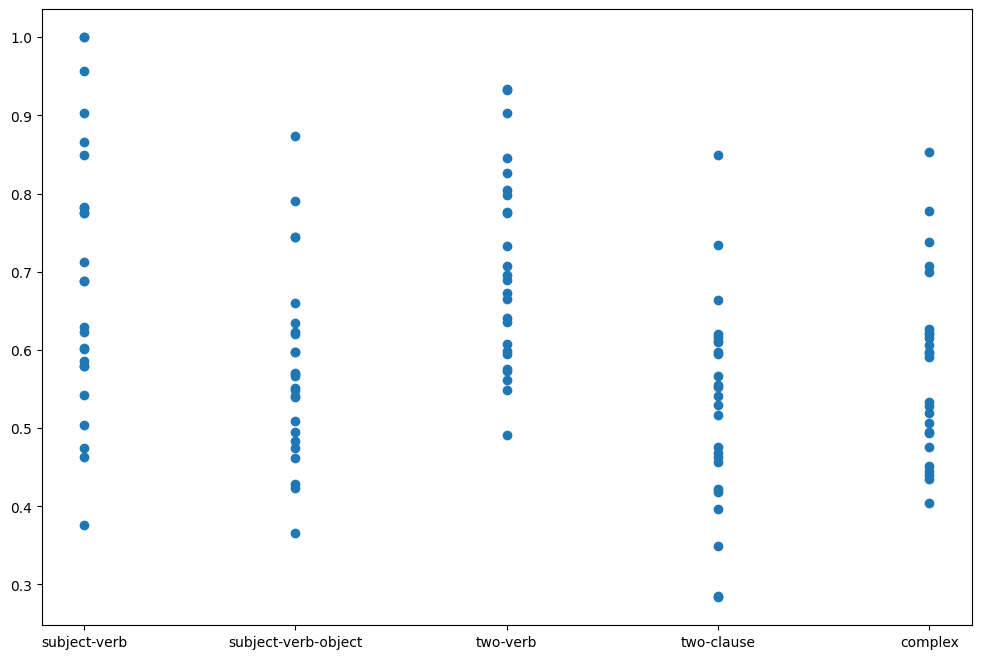

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
# plt.plot(sim_results)
plt.scatter(df['type'],sim_results)

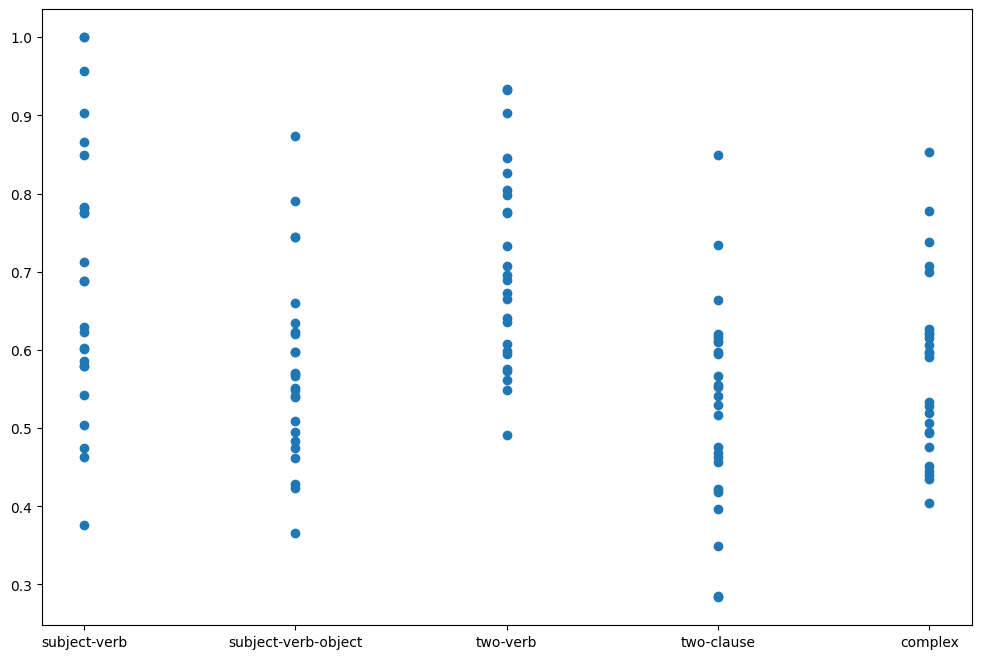

In [45]:
plt.figure(figsize=(12, 8))
# plt.plot(sim_results)
plt.scatter(df['type'],sim_results)

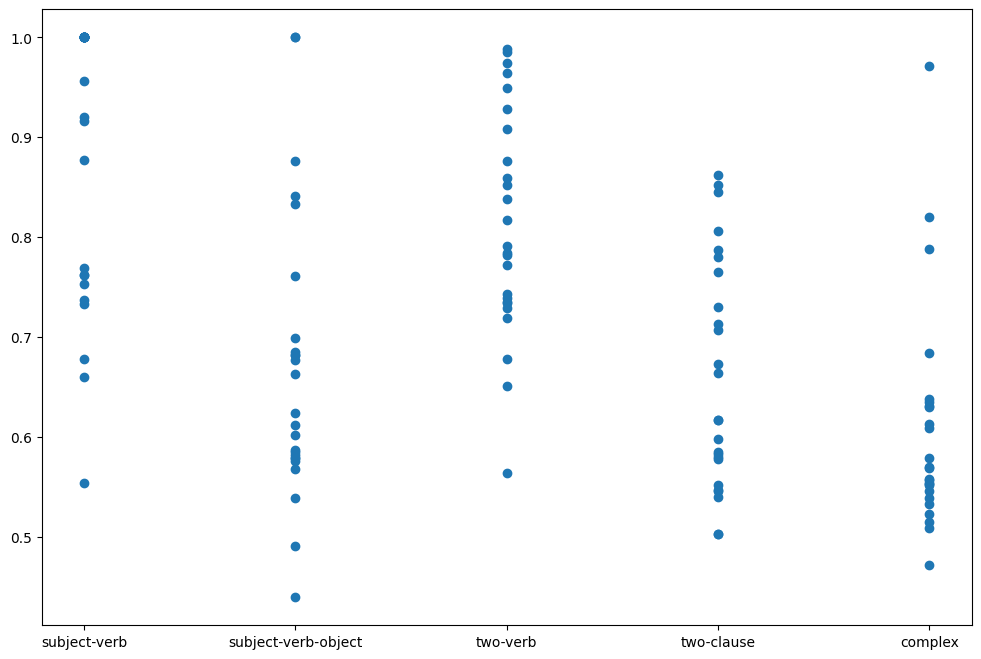

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
# plt.plot(sim_results)
plt.scatter(df['type'], df['sim_comparator'])